# Data Wrangling of @dog_rates

### Content:
#### This project shows the data wrangling and analysis process of the twitter archive from WeRateDogs which is famous for rating different pictures of dogs. This process contains the gathering, assessing and cleaning of the data to analyze and visualize the results.


### [1. Gathering](#Gathering)
### [2. Assessing](#Assessing)
### [3. Cleaning](#Cleaning)
### [4. Analysis and Visualization](#Analysis)

### Gathering

In [1]:
# Import necessary libraries
import pandas as pd
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
from PIL import Image


#### Twitter archive

In [2]:
# Read the twitter archive as csv file anmd convert it to dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv')


#### Image predictions

In [3]:
# Define the url and get the response
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# Download the tweet image predictions .tsv file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

# Read the .tsv file
df_pred = pd.read_csv('image-predictions.tsv', sep='\t')


#### Tweepy data

In [5]:
# Tweepy settings
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
# Query the tweets dependent on the tweet_id
tweets = []
tweets_not_found = []

for tweet_id in df_archive['tweet_id']:   
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweets.append(tweet)
    except Exception as e:
        tweets_not_found.append(tweet_id)

Rate limit reached. Sleeping for: 47
Rate limit reached. Sleeping for: 742
Rate limit reached. Sleeping for: 742


In [7]:
# Write json data in .txt file line by line
with open('tweet_json.txt', 'w') as outfile:
    for d in tweets:
        outfile.write(json.dumps(d))
        outfile.write("\n")

In [8]:
# Read the txt file as a dataframe
df_tweepy = pd.read_json('tweet_json.txt', lines=True)
df_tweepy = df_tweepy[['id', 'full_text', 'favorite_count', 'retweet_count', 'created_at']]

### Assessing

#### Twitter archive

In [9]:
# First overview of the twitter archive data
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
# Get info about missing values and data types
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# Statistical overview
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# Check for duplicates
df_archive['tweet_id'].duplicated().sum()

0

In [13]:
# Check the status of the different dog stages
df_archive_dog_status = df_archive[(df_archive['doggo'] == "None") & (df_archive['floofer'] == "None") & (df_archive['pupper'] == "None") & (df_archive['puppo'] == "None")]
len(df_archive_dog_status)

1976

In [14]:
# Is the value of every rating_denominator 10?
df_archive_denom = df_archive[df_archive['rating_denominator'] != 10]
print("Number of tweets with wrong denominator: ", len(df_archive_denom))
df_archive_denom

Number of tweets with wrong denominator:  23


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [15]:
# Unique values in the source column
df_archive.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

#### Image predictions

In [16]:
# First overview of the prediction data
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
# Get info about missing values and data types
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# Statistical overview
df_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
# Check for duplicates by id
df_pred['tweet_id'].duplicated().sum()

0

In [20]:
# Check for duplicates by jpg_url
df_pred['jpg_url'].duplicated().sum()

66

#### Tweepy data

In [21]:
# First overview of the tweepy data
df_tweepy.head()

,id,full_text,favorite_count,retweet_count,created_at
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,35466,7490,2017-08-01 16:23:56
1,892177421306343426,This is Tilly. She's just checking pup on you....,30699,5557,2017-08-01 00:17:27
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,23091,3680,2017-07-31 00:18:03
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,38763,7667,2017-07-30 15:58:51
4,891327558926688256,This is Franklin. He would like you to stop ca...,37038,8271,2017-07-29 16:00:24


In [22]:
# Get info about missing values and data types
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
id                2331 non-null int64
full_text         2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
created_at        2331 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 91.1+ KB


In [23]:
# Statistical overview
df_tweepy.describe()

,id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7410.909052,2635.001287
std,6.823170e+16,11508.344456,4456.205959
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1288.000000,535.000000
50%,7.182469e+17,3221.000000,1230.000000
75%,7.986692e+17,9069.000000,3059.000000
max,8.924206e+17,152946.000000,75704.000000


In [24]:
# Check for duplicates by id
df_tweepy['id'].duplicated().sum()

0

#### Assessments

With visual assessments in Excel and the programmatic assessments above, there are following things which need to be fixed.

##### Quality
df_archive:
- retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are not null) need to be removed
- missing values for in_reply_to_status_id, in_reply_to_user_id and expanded_urls
- Unused columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- timestamp is not in datetime format
- many missing dog stages
- There are some wrong rating_numerator and denominator
- Source column is in a bad format (href link)

df_pred:
- there are some duplicates with the same jpg_url

df_tweepy:
- 'created_at' and 'full_text' can be dropped (already in df_archive)
- id should be named tweet_id


##### Tidiness
- fraction of rating_numerator and rating_denominator should be own column (instead of two)
- datasets with necessary columns should be joined together

### Cleaning

#### Twitter archive

In [57]:
# Copy the dataframe
df_archive_copy = df_archive.copy()

##### Define

- Remove the retweets based on retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

##### Code

In [58]:
# Keep the tweets where retweeted_status_id is null
df_archive_copy = df_archive_copy[df_archive_copy['retweeted_status_id'].isnull()]

##### Test

In [59]:
# The sum of the retweet columns should be 0
assert (df_archive_copy['retweeted_status_id'].sum()+df_archive_copy['retweeted_status_user_id'].sum()+df_archive_copy['retweeted_status_timestamp'].sum())==0

##### Define

- Remove the unused columns in_reply_to_status_id, in_reply_to_user_id, expanded_urls and name

##### Code

In [60]:
# Drop the columns
df_archive_copy = df_archive_copy.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls', 'name'])

##### Test

In [61]:
df_archive_copy.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,None,None,None,None


##### Define

- Remove the unused retweet columns

##### Code

In [62]:
# drop the columns
df_archive_copy = df_archive_copy.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

##### Test

In [63]:
df_archive_copy.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,None,None,None,None


##### Define

- Change the timestamp to datetime format. 

##### Code

In [64]:
# Change the timestamp to datetime format
df_archive_copy['timestamp'] = pd.to_datetime(df_archive_copy['timestamp'])

##### Test

In [65]:
df_archive_copy.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
rating_numerator               int64
rating_denominator             int64
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

##### Define
- Remove the dog stages since there are many missing values

##### Code

In [66]:
# Drop the columns
df_archive_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

##### Test

In [67]:
df_archive_copy.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10


##### Define

- As 10 seems to be the viable value in the column rating_denominator: Find entries in column 'text' which contain '/10', but have wrong ratings. Then extract the previous string (number) before '/10' and set it as the new numerator and '10' as the new demoninator. After that drop all entries which do not contain '/10' in the text column. There are some tweets with no ratings and some tweets with another scale which are ignored/removed because of this process.

##### Code

In [68]:
for index, tweet in df_archive_denom.iterrows():
    if tweet.text.find('/10')!=-1:
        numerator = tweet.text.split('/10')[0][-2:]
        df_archive_copy.loc[df_archive_copy.tweet_id == tweet.tweet_id, ['rating_numerator', 'rating_denominator']] = int(numerator), 10
    else:
        df_archive_copy.drop(df_archive_copy[df_archive_copy.tweet_id == tweet.tweet_id].index, inplace=True)


##### Test

In [69]:
# Check if there are other values than 10 in the denominator
len(df_archive_copy[df_archive_copy['rating_denominator'] != 10])

0

##### Define

- Calculate the fraction of the rating_numerator and rating_denominator and build a new column. Remove the rating_numerator and rating_denominator column afterwards.

##### Code

In [70]:
df_archive_copy['rating'] = df_archive_copy['rating_numerator']/df_archive_copy['rating_denominator']
df_archive_copy.drop(columns=['rating_numerator', 'rating_denominator'], inplace = True)

##### Test

In [71]:
df_archive_copy.head()

,tweet_id,timestamp,source,text,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,1.2


##### Define
- Change the source column just to the name of the actual source (iPhone, Vine, Twitter Web Client, tweetdeck)
- After that change the data type to 'category'

##### Code

In [72]:
# Change the values in the source column
df_archive_copy.loc[df_archive_copy.source.str.find('iPhone') != -1, 'source'] = 'iPhone'
df_archive_copy.loc[df_archive_copy.source.str.find('Vine') != -1, 'source'] = 'Vine'
df_archive_copy.loc[df_archive_copy.source.str.find('Twitter Web Client') != -1, 'source'] = 'Twitter Web Client'
df_archive_copy.loc[df_archive_copy.source.str.find('tweetdeck') != -1, 'source'] = 'tweetdeck'

# Change the data type
df_archive_copy['source'] = df_archive_copy['source'].astype('category')

##### Test

In [73]:
df_archive_copy.source.unique()

[iPhone, Twitter Web Client, Vine, tweetdeck]
Categories (4, object): [iPhone, Twitter Web Client, Vine, tweetdeck]

#### Image predictions

In [74]:
# Copy the dataframe
df_pred_copy = df_pred.copy()

##### Define
- Remove duplicate jpg_urls

##### Code/Test

- The duplicate jpg_urls exist because of retweets. Those retweets are removed in the df_archive cleaning process.

##### Define
- Drop unused columns

##### Code

In [75]:
df_pred_copy.drop(columns=['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' ], inplace = True)

#### Tweepy data

In [76]:
# Copy the dataframe
df_tweepy_copy = df_tweepy.copy()

##### Define
- Drop the column 'created_at' and 'full_text'

##### Code

In [77]:
df_tweepy_copy.drop(columns=['created_at', 'full_text'], inplace = True)

##### Test

In [78]:
df_tweepy_copy.head()

,id,favorite_count,retweet_count
0,892420643555336193,35466,7490
1,892177421306343426,30699,5557
2,891815181378084864,23091,3680
3,891689557279858688,38763,7667
4,891327558926688256,37038,8271


##### Define
- Rename the 'id' column to 'tweet_id'

##### Code

In [79]:
# Renaming
df_tweepy_copy.rename(columns={'id':'tweet_id'}, inplace=True)

##### Test

In [80]:
df_tweepy_copy.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35466,7490
1,892177421306343426,30699,5557
2,891815181378084864,23091,3680
3,891689557279858688,38763,7667
4,891327558926688256,37038,8271


In [81]:
# Merge the three dataframes
df_master = pd.merge(df_archive_copy, df_pred_copy, how='inner', on=['tweet_id']).copy()
df_master = pd.merge(df_master, df_tweepy_copy, how='inner', on=['tweet_id']).copy()

# Save the dataframe as csv
df_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index = False)
df_master.head()

,tweet_id,timestamp,source,text,rating,jpg_url,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,35466,7490
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,30699,5557
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,23091,3680
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,38763,7667
4,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,37038,8271


In [82]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 1973
Data columns (total 8 columns):
tweet_id          1974 non-null int64
timestamp         1974 non-null datetime64[ns]
source            1974 non-null category
text              1974 non-null object
rating            1974 non-null float64
jpg_url           1974 non-null object
favorite_count    1974 non-null int64
retweet_count     1974 non-null int64
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 125.5+ KB


### Analysis

##### In which period of time where the tweets published?

In [83]:
# Get the minimum and maximum timestamp
min_time = df_master.timestamp.min()
max_time = df_master.timestamp.max()

print("The tweets have been published between", min_time, "and", max_time, ".")

The tweets have been published between 2015-11-15 22:32:08 and 2017-08-01 16:23:56 .


##### How many tweets have been published per month?

In [84]:
tweets_per_month = df_master.timestamp.dt.to_period('M').value_counts().sort_index()
tweets_per_month

2015-11    296
2015-12    364
2016-01    167
2016-02    109
2016-03    117
2016-04     54
2016-05     56
2016-06     81
2016-07     86
2016-08     59
2016-09     62
2016-10     65
2016-11     53
2016-12     53
2017-01     65
2017-02     63
2017-03     46
2017-04     41
2017-05     43
2017-06     43
2017-07     49
2017-08      2
Freq: M, Name: timestamp, dtype: int64

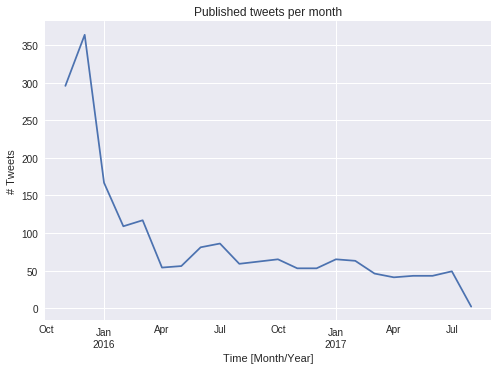

In [85]:
# Plot the number of tweets per month
tweets_per_month.plot('line')
plt.xlabel('Time [Month/Year]')
plt.ylabel('# Tweets')
plt.title('Published tweets per month');

After many published tweets during the end of 2015, there was a big decrease during time until August 2017.

##### Which sources have been used most often to publish a tweet?

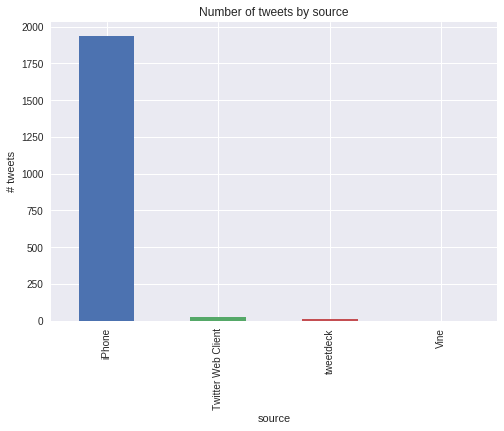

In [86]:
# Count the values of sources and plot it as bar chart
df_master['source'].value_counts().plot(kind='bar')
plt.xlabel('source')
plt.ylabel('# tweets')
plt.title('Number of tweets by source');

There is a high number of published tweets by iPhone observable.

##### How are the retweet_counts related to the favorite_counts?

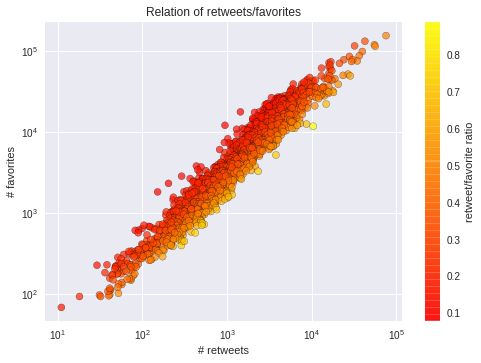

In [87]:
# Show the relation of retweets and favorites with scatterplot
favorites = df_master['favorite_count']
retweets = df_master['retweet_count']
plt.style.use('seaborn')
plt.scatter(retweets, favorites, c=retweets/favorites, cmap='autumn', edgecolor='black', alpha=0.7)
cbar = plt.colorbar()
cbar.set_label('retweet/favorite ratio')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('# retweets')
plt.ylabel('# favorites')
plt.title('Relation of retweets/favorites');

Most of the time the number of favorites is slightly higher than the number of retweets.